# РАДИ ВСЕГО СВЯТОГО - НЕ ЗАПУСКААААЙ

In [2]:
%pwd

'/content'

In [3]:
import os
os.chdir('/content/drive/MyDrive/handwritten-ocr-main')
%pwd

'/content/drive/MyDrive/handwritten-ocr-main'

In [ ]:
# mount google drive if need


# pip's

In [1]:
# pip's
!pip install Pillow
!pip install Levenshtein
!pip install cer
!pip install werpy

# функции для обработки

In [4]:
# check image resolution
from PIL import Image

def get_image_dimensions_pil(filename):
    with Image.open(filename) as img:
        width, height = img.size
        # print(f"Image dimensions (Pillow): {width}x{height} pixels")
        return width, height

# example usage:
# get_image_dimensions_pil("/content/drive/MyDrive/handwritten-ocr-main/data/processed/hwr200/tenPercentTest/hwr200_0_19_0_10_bright.jpg")

# Обработка данных для создания единого датасета по инференсу моделей

In [5]:
import os
import pandas as pd
import sys

# features times: 'file_name', 'aug_name', 'img_width', 'img_height', 'ncalls', 'tottime', 'percall_tottime', 'cumtime', 'percall_cumtime', 'filename:lineno(func)'

# FOLDER_PATH = '/content/drive/MyDrive/handwritten-ocr-main/data/processed/hwr200/tenPercentTest' # . for the current directory or specify path
FOLDER_PATH = '/content/drive/MyDrive/handwritten-ocr-main/data/h_test/images'

df = pd.DataFrame(columns=['file_name', 'aug_name', 'model_name', 'img_width', 'img_height', 'ncalls', 'tottime', 'percall_tottime', 'cumtime', 'percall_cumtime', 'filename:lineno(func)'])

print(f"Files in the directory: {FOLDER_PATH}")
for entry in os.listdir(FOLDER_PATH):
    full_path = os.path.join(FOLDER_PATH, entry) # Get the full path
    if os.path.isfile(full_path):
      if entry[len(entry)-8:] == 'logs.csv' :

        spl_entry = entry.split('_')

        pre_df = pd.read_csv(f'{FOLDER_PATH}/{entry}')
        p_list = []

        if len(spl_entry) == 11 :
          p_list.append('_'.join(spl_entry[0:7])) # file_name
          p_list.append('_'.join(spl_entry[6:7])) # aug_name
          p_list.append('_'.join(spl_entry[7:-2])) # model_name
          image_width, image_height = get_image_dimensions_pil(f'{FOLDER_PATH}/{'_'.join(spl_entry[0:7])}.jpg')
          p_list.append(image_width) # image_width
          p_list.append(image_height) # image_height

        elif len(spl_entry) == 7 :
          file_name = '_'.join(spl_entry[0:3]).replace('.', '')
          augment = '_'.join(spl_entry[2:3]).replace('.', '')
          model_name = '_'.join(spl_entry[3:5]).replace('.', '')

          p_list.append('_'.join(spl_entry[0:3]).replace('.', '')) # file_name
          p_list.append('_'.join(spl_entry[2:3]).replace('.', '')) # aug_name
          p_list.append('_'.join(spl_entry[3:5]).replace('.', '')) # model_name

          image_width = 0
          image_height = 0
          if os.path.exists(f'{FOLDER_PATH}/{file_name}.jpeg'):
            image_width, image_height = get_image_dimensions_pil(f'{FOLDER_PATH}/{file_name}.jpeg')
          else:
            image_width, image_height = get_image_dimensions_pil(f'{FOLDER_PATH}/{file_name}.jpg')

          p_list.append(image_width)
          p_list.append(image_height)

        else :
          p_list.append('_'.join(spl_entry[0:6])) # file_name
          p_list.append('_'.join(spl_entry[5:6])) # aug_name
          p_list.append('_'.join(spl_entry[6:-2])) # model_name
          image_width, image_height = get_image_dimensions_pil(f'{FOLDER_PATH}/{'_'.join(spl_entry[0:6])}.jpg')
          p_list.append(image_width) # image_width
          p_list.append(image_height) # image_height

        for i in range(min(7, len(pre_df))) :
          end_list = []

          end_list.append(pre_df.iloc[i].values[1]) # ncalls
          end_list.append(pre_df.iloc[i].values[2]) # tottime
          end_list.append(pre_df.iloc[i].values[3]) # percall_tottime
          end_list.append(pre_df.iloc[i].values[4]) # cumtime
          end_list.append(pre_df.iloc[i].values[5]) # percall_tottime
          end_list.append(pre_df.iloc[i].values[6]) # filename:lineno(func)

          df.loc[len(df)] = p_list + end_list

display(df)


Files in the directory: /content/drive/MyDrive/handwritten-ocr-main/data/h_test/images


,file_name,aug_name,model_name,img_width,img_height,ncalls,tottime,percall_tottime,cumtime,percall_cumtime,filename:lineno(func)
0,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,880,0.015,0.000,36.738,0.042,__init__.py:1(<module>)
1,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,28,0.000,0.000,17.829,0.637,_contextlib.py:113(decorate_context)
2,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.002,0.000,17.774,0.684,utils.py:2233(generate)
3,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.113,0.004,17.435,0.671,utils.py:2686(_sample)
4,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,285772/1354,0.253,0.000,9.734,0.007,module.py:1735(_wrapped_call_impl)
...,...,...,...,...,...,...,...,...,...,...,...
8280,5_82_grid,grid,trocr_kazars,3024,4032,74,0.005,0.000,24.413,0.330,utils.py:2233(generate)
8281,5_82_grid,grid,trocr_kazars,3024,4032,74,0.137,0.002,23.900,0.323,utils.py:3111(_beam_search)
8282,5_82_grid,grid,trocr_kazars,3024,4032,64/2,0.000,0.000,16.425,8.213,base_predictor.py:218(__call__)
8283,5_82_grid,grid,trocr_kazars,3024,4032,64/2,0.001,0.000,16.357,8.178,base_predictor.py:310(apply)


## Метаданные изображения:
`file_name` — имя исходного файла изображения

`aug_name` — название применённой аугментации (например, motion)

`model_name` — используемая модель для распознавания (например, TrOCR)

`img_width` — ширина изображения в пикселях

`img_height` — высота изображения в пикселях


## Метрики производительности:

`ncalls` — количество вызовов функции (если есть дробь: общие/рекурсивные вызовы)

`tottime` — чистое время выполнения функции (без вложенных вызовов) в секундах

`percall_tottime` — среднее время на один вызов (tottime / ncalls)

`cumtime` — общее время выполнения с учётом всех вложенных функций

`percall_cumtime` — среднее общее время на один вызов (cumtime / ncalls)

## Информация о функции:

`filename:lineno(func)` — идентификатор функции: файл, строка и имя функции

**Контекст данных:**
данные показывают производительность модели OCR при обработке изображений с разными аугментациями. Для каждого изображения замеряется время выполнения различных функций конвейера обработки, что позволяет анализировать узкие места и влияние аугментаций на производительность.



In [6]:
df.to_csv('/content/drive/MyDrive/handwritten-ocr-main/data/h_test/results/models_perfomance.csv', index=False)
df.head()

,file_name,aug_name,model_name,img_width,img_height,ncalls,tottime,percall_tottime,cumtime,percall_cumtime,filename:lineno(func)
0,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,880,0.015,0.000,36.738,0.042,__init__.py:1(<module>)
1,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,28,0.000,0.000,17.829,0.637,_contextlib.py:113(decorate_context)
2,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.002,0.000,17.774,0.684,utils.py:2233(generate)
3,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.113,0.004,17.435,0.671,utils.py:2686(_sample)
4,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,285772/1354,0.253,0.000,9.734,0.007,module.py:1735(_wrapped_call_impl)


In [7]:
from pathlib import Path

# features: 'file_name', 'model_name', 'pred', 'gt'

ANNOTATION_PATH = '/content/drive/MyDrive/handwritten-ocr-main/data/raw/hwr200/annotations'
GT_PATH = '/content/drive/MyDrive/handwritten-ocr-main/data/h_test/images'

anns = pd.read_csv('/content/drive/MyDrive/handwritten-ocr-main/data/raw/school_notebooks_ru/annotations.csv')

df_ocr = pd.DataFrame(columns=['file_name', 'model_name', 'augmentation', 'pred', 'gt'])
check_names = []

for entry in os.listdir(FOLDER_PATH):
    full_path = os.path.join(FOLDER_PATH, entry) # Get the full path
    if os.path.isfile(full_path):

      if (entry[len(entry)-8:] != 'logs.csv') and (entry[len(entry)-8:] != 'logs.txt') and (entry[len(entry)-4:] == '.txt'):
        # print(f'{'_'.join(entry.split('_')[:5])}.txt') # for gt name
        # print(f'{entry.split('.')[0]}', f'{entry.split('.')[1]}') # for pred name

        file_name_aug = ''
        model_name = ''
        aug = ''
        pred = ''
        gt = ''

        if entry[0:3] != 'hwr' :
          # print(entry)
          img_name = f'{'_'.join(entry.split('.')[0].split('_')[:-1])}.jpg'

          if ' '.join((anns[anns.image == f'{img_name}']['text'].values)) == '' :
            img_name = f'{'_'.join(entry.split('.')[0].split('_')[:-1])}.jpeg'

          gt = ' '.join((anns[anns.image == f'{img_name}']['text'].values))


          file_path_pred = f'{FOLDER_PATH}/{entry}'
          pred = Path(file_path_pred).read_text(encoding='utf-8').replace('\n', ' ')


          file_name_aug = entry.split('.')[0]
          model_name = entry.split('.')[1]
          aug = entry.split('.')[0].split('_')[-1]

        else :




        # for hwr
          file_name = '_'.join(entry.split('_')[:5])
          file_name_aug = entry.split('.')[0]
          model_name = entry.split('.')[1]
          name_aug = entry.split('.')[0].split('_')[-1]
          aug = name_aug if len(name_aug) > 2 else 'without aug'

          file_path_gt = f'{ANNOTATION_PATH}/{file_name}.txt' # for gt
          gt = Path(file_path_gt).read_text(encoding='utf-8')

          file_path_pred = f'{GT_PATH}/{file_name_aug}.{model_name}.txt'
          pred = Path(file_path_pred).read_text(encoding='utf-8').replace('\n', ' ')


        df_ocr.loc[len(df_ocr)] = [file_name_aug, model_name, aug, pred, gt]



In [9]:
df_ocr = df_ocr[df_ocr['gt'] != '']

In [10]:
from Levenshtein import distance
from cer import calculate_cer
from werpy import wer

df_ocr['distance'] = df_ocr.apply(lambda row: distance(row['gt'], row['pred']), axis=1)
df_ocr['cer'] = df_ocr.apply(lambda row: calculate_cer(row['gt'].split(' '), row['pred'].split(' ')), axis=1)
df_ocr['wer'] = df_ocr.apply(lambda row: wer(row['gt'], row['pred']), axis=1)

df_ocr.head()

,file_name,model_name,augmentation,pred,gt,distance,cer,wer
0,hwr200_40_59_50_1_l_motion,trocr_raxtemur,motion,"""высокошалоспозиций.авторовоставительно-воспом...","Я согласна с позицией автора. Действительно, в...",557,0.400431,0.966851
1,hwr200_20_39_20_11_d_motion,trocr_raxtemur,motion,"""Врассказел""Улицкой показания"" подавлеными час...",В рассказе Л. Улицкой показана история с подар...,318,0.380838,0.984000
2,hwr200_20_39_20_9_d_elastic,trocr_raxtemur,elastic,Когда-жевозникает-конфликт-международными разу...,Когда же возникает конфликт между чувствами и ...,861,0.475691,0.992620
3,25_250_grid,trocr_raxtemur,grid,Двадцать пятое сентября Контрольный диктант. С...,3 1 4 и грибами нет Пах- свеж. путешествии. бл...,659,0.805356,0.977099
4,hwr200_0_19_0_10_motion,trocr_raxtemur,motion,качества присущи боепи Каеше геловец? Над Южн ...,Какие качества присущи воспитанному человеку? ...,329,0.411922,0.794872


In [14]:
df_ocr.to_csv('/content/drive/MyDrive/handwritten-ocr-main/data/h_test/results/models_metrics.csv', index=False)

In [21]:
df_ocr

,file_name,model_name,augmentation,pred,gt,distance,cer,wer
0,hwr200_40_59_50_1_l_motion,trocr_raxtemur,motion,"""высокошалоспозиций.авторовоставительно-воспом...","Я согласна с позицией автора. Действительно, в...",557,0.400431,0.966851
1,hwr200_20_39_20_11_d_motion,trocr_raxtemur,motion,"""Врассказел""Улицкой показания"" подавлеными час...",В рассказе Л. Улицкой показана история с подар...,318,0.380838,0.984000
2,hwr200_20_39_20_9_d_elastic,trocr_raxtemur,elastic,Когда-жевозникает-конфликт-международными разу...,Когда же возникает конфликт между чувствами и ...,861,0.475691,0.992620
3,25_250_grid,trocr_raxtemur,grid,Двадцать пятое сентября Контрольный диктант. С...,3 1 4 и грибами нет Пах- свеж. путешествии. бл...,659,0.805356,0.977099
4,hwr200_0_19_0_10_motion,trocr_raxtemur,motion,качества присущи боепи Каеше геловец? Над Южн ...,Какие качества присущи воспитанному человеку? ...,329,0.411922,0.794872
...,...,...,...,...,...,...,...,...
1298,hwr200_40_59_50_11_l_gauss,trocr_kazars,gauss,Полстим пращия в востра. то гта и дадт. Оти аб...,Поистине красивая вещь приводит в восторг того...,624,0.591437,0.938356
1299,hwr200_0_19_0_9_d_gauss,trocr_kazars,gauss,правотвенно-финость гели рассупрать ий ту Преж...,Прежде чем рассуждать на эту нравственно-филос...,1108,0.718118,0.944444
1302,hwr200_40_59_50_12_bright,trocr_kazars,bright,ва и дыпры выши по том попросай разажачанат чи...,Как его достигнуть? Именно над этими вопросами...,953,0.658378,0.927536
1303,30_288_bright,trocr_kazars,bright,"а на буфах- прополпин и Много яблак, мнок, пол...",555. много мягк; богат относящимися к берег гр...,1208,0.850209,0.974895


In [20]:
df

,file_name,aug_name,model_name,img_width,img_height,ncalls,tottime,percall_tottime,cumtime,percall_cumtime,filename:lineno(func)
0,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,880,0.015,0.000,36.738,0.042,__init__.py:1(<module>)
1,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,28,0.000,0.000,17.829,0.637,_contextlib.py:113(decorate_context)
2,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.002,0.000,17.774,0.684,utils.py:2233(generate)
3,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,26,0.113,0.004,17.435,0.671,utils.py:2686(_sample)
4,hwr200_40_59_50_1_l_motion,motion,trocr_raxtemur,859,1265,285772/1354,0.253,0.000,9.734,0.007,module.py:1735(_wrapped_call_impl)
...,...,...,...,...,...,...,...,...,...,...,...
8280,5_82_grid,grid,trocr_kazars,3024,4032,74,0.005,0.000,24.413,0.330,utils.py:2233(generate)
8281,5_82_grid,grid,trocr_kazars,3024,4032,74,0.137,0.002,23.900,0.323,utils.py:3111(_beam_search)
8282,5_82_grid,grid,trocr_kazars,3024,4032,64/2,0.000,0.000,16.425,8.213,base_predictor.py:218(__call__)
8283,5_82_grid,grid,trocr_kazars,3024,4032,64/2,0.001,0.000,16.357,8.178,base_predictor.py:310(apply)



## **Идентификационные фичи:**
- `file_name` — имя исходного файла с изображением текста
- `model_name` — название модели распознавания текста (OCR)
- `augmentation` — тип применённой аугментации к изображению

## **Текстовые данные:**
- `pred` — текст, распознанный моделью OCR (предсказание)
- `gt` — ground truth (эталонный, правильный текст)

## **Метрики качества распознавания:**
- `distance` — расстояние Левенштейна (редакционное расстояние) между pred и gt
  *Количество операций (вставок, удалений, замен) для преобразования pred в gt*
- `cer` — Character Error Rate (коэффициент ошибок на символах)
  *`distance / длина gt` — доля ошибочных символов (0-1, где 0 — идеально)*
- `wer` — Word Error Rate (коэффициент ошибок на словах)
  *Доля слов с ошибками (0-1, где 0 — идеально)*

## **Контекст данных:**
Набор данных для оценки качества OCR-моделей. Содержит результаты распознавания текста с различными аугментациями изображений. Метрики CER и WER позволяют оценить точность модели и влияние разных типов искажений на качество распознавания.

In [ ]:
# не важно
# prompt: ниже представлен текст, который распознала модель OCR, сделай в нем исправления,
# что бы он стал читаемый, в словах, где это возможно, если не получается подобрать слово, то оставь как есть

llm = 'Какие качества присущи воспитанному человеку? Над этим вопросом размышляет А.П. Чехов. Писатель рассматривает проблему на примере своего героя, который размышляет о сущности воспитанных личностей: "Они уважительны, тактичны, неболтливы, интеллигентны, воспитаны. Созданные ими отношения спрашивают" [оригинал неясен]. Иными словами, такие люди уважительно относятся к личному пространству друзей. Воспитанный человек всегда вежлив и тактичен. Чехов говорит о влиянии прогресса на людей. Что сделало технический прогресс с людьми? "Стали ли мы гуманнее, безопаснее, чем были когда-то? Или же те, кто жили без этих ухищрений..." По мнению автора, прогресс сделал могущественными каждое государство и человечество в целом, но стал ли от этого счастливее человек? Сложность заставляет порассуждать.'
pred = 'качества присущи боепи Каеше геловец? Над Южн бопро- томиому союзадумывается"А.П.Чехов. Писатель рассщивает проблемц ид примере своего героя, который разному суждений боепиташеек: личностях: Ош лет о изболтливы инструкт-стирован- постели,козданные спрашивают". Ииюму слобами,ташие модельно-уважительно относятся климану-пространству дружь, боепиташный генобем всегда бетлетв и так- Чешовем 21 деетя прогресса на людей Что снимало!Комподмеял техническийпрогресс по людей."Иотям ли аш губствобать себя-безопаснее, чем беи казад? Илиенио те, кто жили бопрост егоухин.По-лишиго-автора, сделала могущественными каждое сударство и лейодегество б.целом", но стал лифин-человек-от-этного Солодехие заставляет поращутдать'
gt = 'Какие качества присущи воспитанному человеку? Над этим вопросом задумывается А.П. Чехов. Писатель раскрывает проблему на примере рассуждений своего героя, который размышляет о воспитанных личностях: «Они не болтливы и не лезут с откровенностями, когда их не спрашивают». Иными словами, такие люди крайне уважительно относятся к личному пространству других, воспитанный человек всегда вежлив и тактичен. 1.Влияние научно–технического прогресса на людей Человек 21 века… Что с ним стало? Как повлиял научно–технический прогресс на людей? И стали ли они чувствовать себя безопаснее, чем те, кто жили век назад? Именно эти вопросы поднимает в своей статье В. Солоухин. По мнению автора, "техника сделала могущественными каждое государство и человечество в целом", но стал ли один человек от этого сильнее? Солоухин заставляет порассуждать нас'

llm_gt_cer = calculate_cer(gt.split(' '), llm.split(' '))
llm_gt_wer =  wer(gt, llm)

print(llm_gt_cer, f', default: {calculate_cer(gt.split(' '), pred.split(' '))}')
print(llm_gt_wer, f', default: {wer(gt, pred)}')


0.4537589498806683 , default: 0.411921809296511
0.5555555555555556 , default: 0.7948717948717948


In [26]:
df['tottime'] = df['tottime'].astype(float)
df['cumtime'] = df['cumtime'].astype(float)
df['percall_cumtime'] = df['percall_cumtime'].astype(float)


## Пример 4

АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ OCR МОДЕЛЕЙ

Обработка данных...

Вычисление статистики...

1. СТАТИСТИКА ВРЕМЕНИ ВЫПОЛНЕНИЯ ПО МОДЕЛЯМ:
                  tottime     cumtime  avg_time_per_call  efficiency_ratio
model_name                                                                
trocr_cyrillic   2834.393   23488.909           0.030914          0.120669
trocr_kazars    12245.400  110578.457           0.032980          0.110739
trocr_raxtemur   4180.362   72011.620           0.000794          0.058051

2. СТАТИСТИКА КАЧЕСТВА РАСПОЗНАВАНИЯ:
                  cer                                wer                \
                 mean median    std    min    max   mean median    std   
model_name                                                               
trocr_cyrillic  0.512  0.471  0.274  0.065  0.981  0.802  0.833  0.192   
trocr_kazars    0.654  0.670  0.148  0.263  0.969  0.944  0.958  0.055   
trocr_raxtemur  0.547  0.504  0.224  0.113  1.000  0.913  0.950  0.090   

          

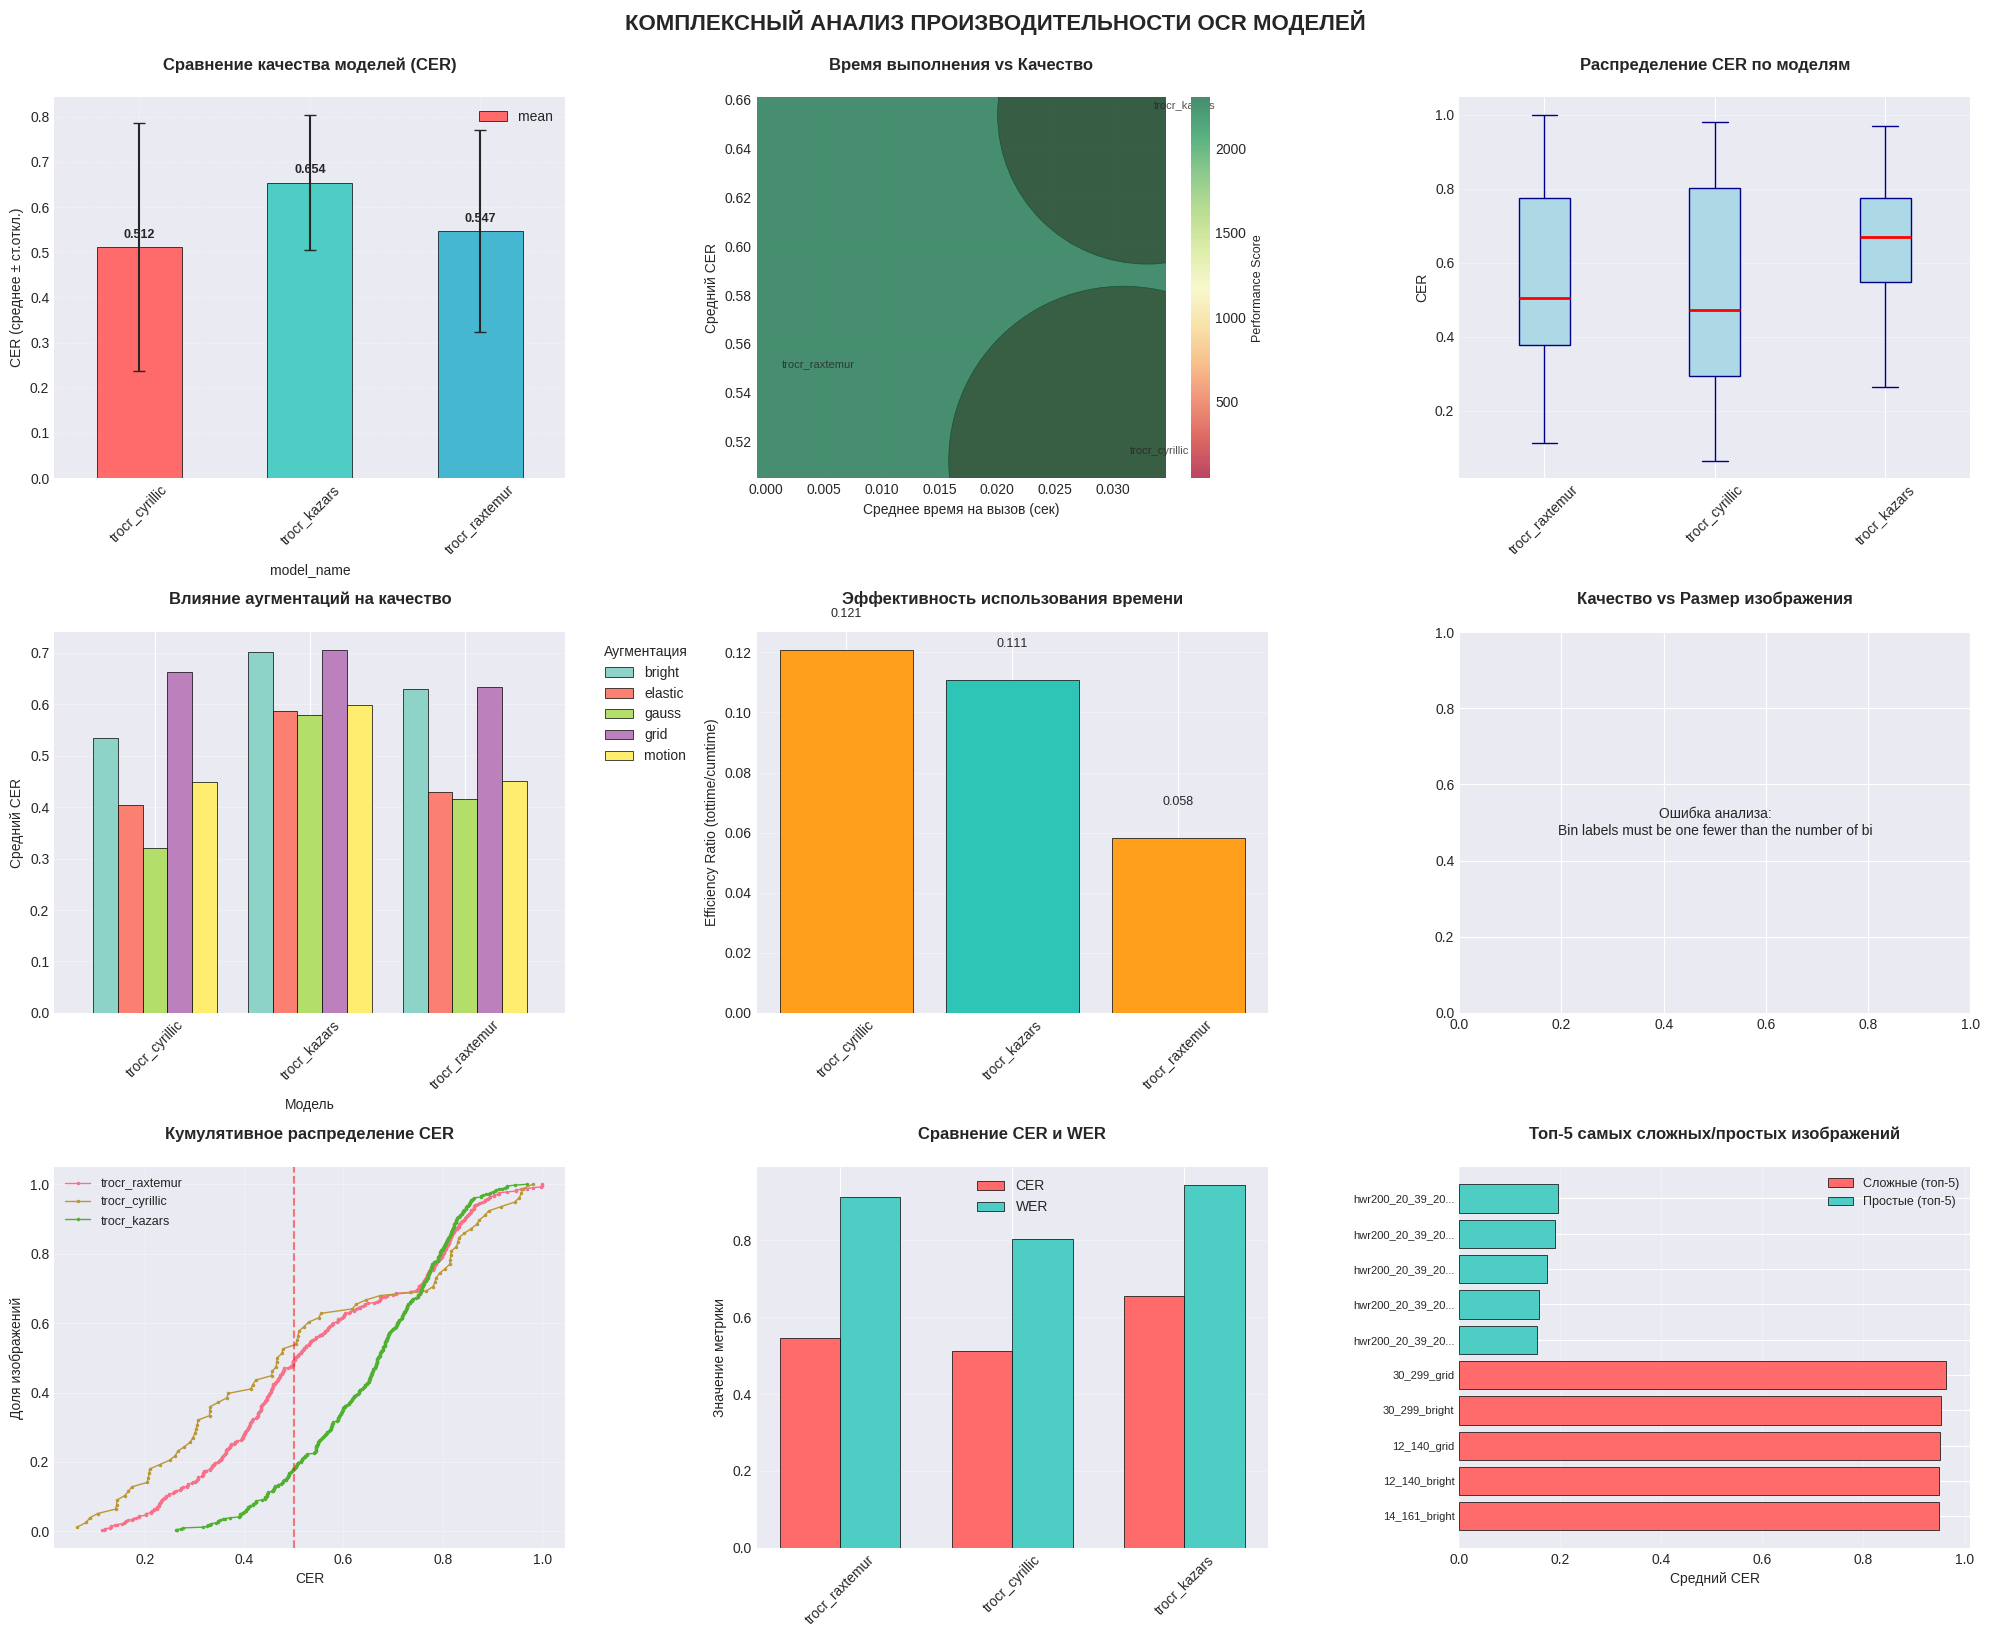


ДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ

4. ЭФФЕКТИВНОСТЬ АУГМЕНТАЦИЙ ПО МОДЕЛЯМ:

trocr_raxtemur:
  Лучшая аугментация: gauss (CER=0.416)
  Худшая аугментация: grid (CER=0.633)

trocr_cyrillic:
  Лучшая аугментация: gauss (CER=0.321)
  Худшая аугментация: grid (CER=0.662)

trocr_kazars:
  Лучшая аугментация: gauss (CER=0.578)
  Худшая аугментация: grid (CER=0.705)

5. СТАТИСТИКА ВЫЗОВОВ ФУНКЦИЙ:
Топ-10 самых ресурсоемких функций:
                                                     tottime    cumtime  \
filename:lineno(func)                                                     
__init__.py:1(<module>)                               20.538  46388.934   
_contextlib.py:113(decorate_context)                   0.889  30114.426   
utils.py:2233(generate)                                3.047  30057.303   
utils.py:3111(_beam_search)                          147.060  23742.264   
utils.py:959(_update_model_kwargs_for_generation)     32.517  14419.291   
{built-in method torch.arange}                     1416

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Стиль графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# ФУНКЦИИ ДЛЯ ОБРАБОТКИ ДАННЫХ
# ============================================================================

def parse_ncalls(value):
    """
    Преобразует значение ncalls из строки в число.
    Форматы: '285772/1354' -> 285772, '64/2' -> 64, '1' -> 1
    """
    if isinstance(value, str):
        if '/' in value:
            # Берем первую часть до '/'
            return int(value.split('/')[0])
        else:
            try:
                return int(value)
            except:
                return 1
    elif pd.isna(value):
        return 1
    else:
        try:
            return int(value)
        except:
            return 1

def safe_convert_to_numeric(series):
    """Безопасное преобразование серии в числовой формат"""
    return pd.to_numeric(series, errors='coerce')

# ============================================================================
# ПОДГОТОВКА ДАННЫХ
# ============================================================================

print("="*80)
print("АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ OCR МОДЕЛЕЙ")
print("="*80)

# 1. Обрабатываем колонку ncalls в df
print("\nОбработка данных...")
df['ncalls_parsed'] = df['ncalls'].apply(parse_ncalls)

# Преобразуем числовые колонки к нужному типу
numeric_cols = ['tottime', 'percall_tottime', 'cumtime', 'percall_cumtime',
                'img_width', 'img_height']
for col in numeric_cols:
    df[col] = safe_convert_to_numeric(df[col])

# Аналогично для df_ocr
numeric_cols_ocr = ['distance', 'cer', 'wer']
for col in numeric_cols_ocr:
    df_ocr[col] = safe_convert_to_numeric(df_ocr[col])

# ============================================================================
# АНАЛИЗ ДАННЫХ
# ============================================================================

# 1. Анализ временных характеристик из df
print("\nВычисление статистики...")
time_stats = df.groupby('model_name').agg({
    'tottime': 'sum',
    'cumtime': 'sum',
    'percall_cumtime': 'mean',
    'ncalls_parsed': 'sum'
}).round(3)

# Убираем возможные NaN значения
time_stats = time_stats.fillna(0)

# Вычисляем дополнительные метрики
time_stats['avg_time_per_call'] = time_stats['cumtime'] / time_stats['ncalls_parsed'].replace(0, 1)
time_stats['efficiency_ratio'] = np.where(
    time_stats['cumtime'] > 0,
    time_stats['tottime'] / time_stats['cumtime'],
    0
)

print("\n1. СТАТИСТИКА ВРЕМЕНИ ВЫПОЛНЕНИЯ ПО МОДЕЛЯМ:")
print(time_stats[['tottime', 'cumtime', 'avg_time_per_call', 'efficiency_ratio']])

# 2. Анализ качества из df_ocr
quality_stats = df_ocr.groupby('model_name').agg({
    'cer': ['mean', 'median', 'std', 'min', 'max'],
    'wer': ['mean', 'median', 'std'],
    'distance': 'mean'
}).round(3)

# Убираем возможные NaN значения
quality_stats = quality_stats.fillna(0)

print("\n2. СТАТИСТИКА КАЧЕСТВА РАСПОЗНАВАНИЯ:")
print(quality_stats)

# 3. Объединяем статистику для комплексного анализа
model_performance = pd.merge(
    time_stats[['cumtime', 'avg_time_per_call', 'efficiency_ratio']],
    quality_stats['cer'][['mean', 'std']].rename(
        columns={'mean': 'cer_mean', 'std': 'cer_std'}
    ),
    left_index=True, right_index=True
)

# Вычисляем performance score с защитой от деления на 0
model_performance['performance_score'] = np.where(
    (model_performance['cer_mean'] > 0) & (model_performance['avg_time_per_call'] > 0),
    1 / (model_performance['cer_mean'] * np.log1p(model_performance['avg_time_per_call'])),
    0
).round(3)

print("\n3. КОМПЛЕКСНАЯ ОЦЕНКА ПРОИЗВОДИТЕЛЬНОСТИ:")
print(model_performance.sort_values('performance_score', ascending=False))

# ============================================================================
# ВИЗУАЛИЗАЦИЯ - НАБОР ГРАФИКОВ
# ============================================================================

fig = plt.figure(figsize=(20, 16))

# График 1: Сравнение качества моделей (CER)
ax1 = plt.subplot(3, 3, 1)
cer_data = df_ocr.groupby('model_name')['cer'].agg(['mean', 'std']).fillna(0)
cer_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
colors = cer_colors[:len(cer_data)]

cer_data.plot(kind='bar', y='mean', yerr='std', capsize=4, ax=ax1,
              color=colors, edgecolor='black', linewidth=0.5)
ax1.set_title('Сравнение качества моделей (CER)', fontsize=12, fontweight='bold', pad=20)
ax1.set_ylabel('CER (среднее ± ст.откл.)', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(cer_data['mean']):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')

# График 2: Время выполнения vs Качество
ax2 = plt.subplot(3, 3, 2)
models = model_performance.index
x = model_performance['avg_time_per_call']
y = model_performance['cer_mean']

# Защита от нулевых значений
x_safe = x.replace(0, np.nan).fillna(x.mean() if x.mean() > 0 else 1)
y_safe = y.replace(0, np.nan).fillna(y.mean() if y.mean() > 0 else 0.5)

sizes = np.where(
    (y_safe > 0) & (x_safe > 0),
    1000 / (y_safe * x_safe),
    100
)

scatter = ax2.scatter(x_safe, y_safe, s=sizes, alpha=0.7,
                     edgecolors='black', linewidth=0.5,
                     c=model_performance['performance_score'],
                     cmap='RdYlGn')
ax2.set_xlabel('Среднее время на вызов (сек)', fontsize=10)
ax2.set_ylabel('Средний CER', fontsize=10)
ax2.set_title('Время выполнения vs Качество', fontsize=12, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Performance Score', fontsize=9)

# Добавляем названия моделей к точкам
for i, model in enumerate(models):
    ax2.annotate(model, (x_safe.iloc[i], y_safe.iloc[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

# График 3: Распределение CER по моделям
ax3 = plt.subplot(3, 3, 3)
models_unique = df_ocr['model_name'].unique()
box_data = []
for model in models_unique:
    model_data = df_ocr[df_ocr['model_name'] == model]['cer']
    # Убираем выбросы для лучшей визуализации
    q1 = model_data.quantile(0.25)
    q3 = model_data.quantile(0.75)
    iqr = q3 - q1
    filtered_data = model_data[(model_data >= q1 - 1.5*iqr) &
                              (model_data <= q3 + 1.5*iqr)]
    box_data.append(filtered_data)

bp = ax3.boxplot(box_data, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='darkblue'),
                capprops=dict(color='darkblue'))
ax3.set_xticklabels(models_unique, rotation=45)
ax3.set_title('Распределение CER по моделям', fontsize=12, fontweight='bold', pad=20)
ax3.set_ylabel('CER', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# График 4: Влияние аугментаций на качество
ax4 = plt.subplot(3, 3, 4)
aug_cer = df_ocr.groupby(['model_name', 'augmentation'])['cer'].mean().unstack().fillna(0)

# Создаем цвета для каждого типа аугментации
augmentations = aug_cer.columns
n_aug = len(augmentations)
aug_colors = plt.cm.Set3(np.linspace(0, 1, max(n_aug, 1)))

aug_cer.plot(kind='bar', ax=ax4, width=0.8,
             edgecolor='black', linewidth=0.5,
             color=aug_colors[:n_aug])
ax4.set_title('Влияние аугментаций на качество', fontsize=12, fontweight='bold', pad=20)
ax4.set_ylabel('Средний CER', fontsize=10)
ax4.set_xlabel('Модель', fontsize=10)
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Аугментация', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3, axis='y')

# График 5: Анализ эффективности (отношение времени)
ax5 = plt.subplot(3, 3, 5)
efficiency_data = time_stats[['efficiency_ratio']].copy()
efficiency_data = efficiency_data.fillna(0)

bars = ax5.bar(efficiency_data.index,
               efficiency_data['efficiency_ratio'],
               color=['#FF9F1C', '#2EC4B6'][:len(efficiency_data)],
               edgecolor='black', linewidth=0.5)
ax5.set_title('Эффективность использования времени', fontsize=12, fontweight='bold', pad=20)
ax5.set_ylabel('Efficiency Ratio (tottime/cumtime)', fontsize=10)
ax5.tick_params(axis='x', rotation=45)
ax5.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# График 6: Heatmap - зависимость качества от размера изображения
ax6 = plt.subplot(3, 3, 6)
# Создаем бины для размеров изображений
df_merged = pd.merge(
    df[['file_name', 'img_width', 'img_height']].drop_duplicates(),
    df_ocr[['file_name', 'cer', 'model_name']],
    on='file_name'
)

# Преобразуем к числовым типам
df_merged['img_width'] = safe_convert_to_numeric(df_merged['img_width'])
df_merged['img_height'] = safe_convert_to_numeric(df_merged['img_height'])

df_merged['total_pixels'] = df_merged['img_width'] * df_merged['img_height']
df_merged = df_merged.dropna(subset=['total_pixels', 'cer'])

if len(df_merged) > 0:
    # Создаем категории только если есть данные
    try:
        df_merged['size_category'] = pd.qcut(
            df_merged['total_pixels'],
            min(4, len(df_merged['total_pixels'].unique())),
            duplicates='drop',
            labels=['Очень маленький', 'Маленький', 'Средний', 'Большой'][:min(4, len(df_merged))]
        )

        size_cer = df_merged.groupby(['model_name', 'size_category'])['cer'].mean().unstack().fillna(0)

        if not size_cer.empty:
            im = ax6.imshow(size_cer.values, cmap='YlOrRd', aspect='auto')
            ax6.set_xticks(range(len(size_cer.columns)))
            ax6.set_xticklabels(size_cer.columns, rotation=45, fontsize=9)
            ax6.set_yticks(range(len(size_cer.index)))
            ax6.set_yticklabels(size_cer.index, fontsize=9)
            ax6.set_title('Качество vs Размер изображения', fontsize=12, fontweight='bold', pad=20)
            plt.colorbar(im, ax=ax6, label='Средний CER')

            # Добавляем значения в ячейки
            for i in range(len(size_cer.index)):
                for j in range(len(size_cer.columns)):
                    ax6.text(j, i, f'{size_cer.iloc[i, j]:.2f}',
                            ha='center', va='center',
                            color='white' if size_cer.iloc[i, j] > 0.5 else 'black',
                            fontsize=8, fontweight='bold')
        else:
            ax6.text(0.5, 0.5, 'Недостаточно данных\nдля анализа',
                    ha='center', va='center', fontsize=12)
            ax6.set_title('Качество vs Размер изображения', fontsize=12, fontweight='bold', pad=20)
    except Exception as e:
        ax6.text(0.5, 0.5, f'Ошибка анализа:\n{str(e)[:50]}',
                ha='center', va='center', fontsize=10)
        ax6.set_title('Качество vs Размер изображения', fontsize=12, fontweight='bold', pad=20)
else:
    ax6.text(0.5, 0.5, 'Нет данных для анализа',
            ha='center', va='center', fontsize=12)
    ax6.set_title('Качество vs Размер изображения', fontsize=12, fontweight='bold', pad=20)

# График 7: Кумулятивное распределение CER
ax7 = plt.subplot(3, 3, 7)
for model in df_ocr['model_name'].unique():
    model_data = df_ocr[df_ocr['model_name'] == model]['cer'].sort_values()
    model_data = model_data.dropna()
    if len(model_data) > 0:
        y = np.arange(1, len(model_data) + 1) / len(model_data)
        ax7.plot(model_data, y, marker='.', linestyle='-', linewidth=1, markersize=3, label=model)
ax7.set_title('Кумулятивное распределение CER', fontsize=12, fontweight='bold', pad=20)
ax7.set_xlabel('CER', fontsize=10)
ax7.set_ylabel('Доля изображений', fontsize=10)
ax7.legend(fontsize=9)
ax7.grid(True, alpha=0.3)
ax7.axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='CER = 0.5')

# График 8: Сравнение WER и CER
ax8 = plt.subplot(3, 3, 8)
models = df_ocr['model_name'].unique()
x = np.arange(len(models))
width = 0.35

cer_means = df_ocr.groupby('model_name')['cer'].mean().reindex(models).fillna(0).values
wer_means = df_ocr.groupby('model_name')['wer'].mean().reindex(models).fillna(0).values

bars1 = ax8.bar(x - width/2, cer_means, width, label='CER', color='#FF6B6B',
                edgecolor='black', linewidth=0.5)
bars2 = ax8.bar(x + width/2, wer_means, width, label='WER', color='#4ECDC4',
                edgecolor='black', linewidth=0.5)

ax8.set_title('Сравнение CER и WER', fontsize=12, fontweight='bold', pad=20)
ax8.set_ylabel('Значение метрики', fontsize=10)
ax8.set_xticks(x)
ax8.set_xticklabels(models, rotation=45)
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

# График 9: Top-5 самых сложных и простых изображений
ax9 = plt.subplot(3, 3, 9)
# Средний CER по файлам
file_difficulty = df_ocr.groupby('file_name')['cer'].mean().sort_values()
file_difficulty = file_difficulty.dropna()

if len(file_difficulty) >= 10:
    top5_hard = file_difficulty.tail(5)
    top5_easy = file_difficulty.head(5)

    x_hard = range(len(top5_hard))
    x_easy = range(len(top5_easy), len(top5_easy) + len(top5_easy))

    bars_hard = ax9.barh(x_hard, top5_hard.values, color='#FF6B6B',
                         label='Сложные (топ-5)', edgecolor='black', linewidth=0.5)
    bars_easy = ax9.barh(x_easy, top5_easy.values, color='#4ECDC4',
                         label='Простые (топ-5)', edgecolor='black', linewidth=0.5)

    ax9.set_title('Топ-5 самых сложных/простых изображений', fontsize=12, fontweight='bold', pad=20)
    ax9.set_xlabel('Средний CER', fontsize=10)
    ax9.set_yticks(list(x_hard) + list(x_easy))
    ax9.set_yticklabels(
        [name[:15] + '...' if len(name) > 15 else name for name in list(top5_hard.index)] +
        [name[:15] + '...' if len(name) > 15 else name for name in list(top5_easy.index)],
        fontsize=8
    )
    ax9.legend(fontsize=9)
    ax9.grid(True, alpha=0.3, axis='x')
else:
    ax9.text(0.5, 0.5, 'Недостаточно данных\nдля анализа топ-5',
             ha='center', va='center', fontsize=12)
    ax9.set_title('Топ-5 самых сложных/простых изображений', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.suptitle('КОМПЛЕКСНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ OCR МОДЕЛЕЙ',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# ============================================================================
# ДОПОЛНИТЕЛЬНЫЕ ТАБЛИЦЫ ДЛЯ АНАЛИЗА
# ============================================================================

print("\n" + "="*80)
print("ДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ")

# Таблица 1: Лучшие и худшие аугментации для каждой модели
print("\n4. ЭФФЕКТИВНОСТЬ АУГМЕНТАЦИЙ ПО МОДЕЛЯМ:")
aug_analysis = df_ocr.groupby(['model_name', 'augmentation']).agg({
    'cer': ['mean', 'std', 'count'],
    'distance': 'mean'
}).round(3)

for model in df_ocr['model_name'].unique():
    if model in aug_analysis.index:
        model_aug = aug_analysis.loc[model]
        if not model_aug.empty:
            best_aug = model_aug[('cer', 'mean')].idxmin()
            worst_aug = model_aug[('cer', 'mean')].idxmax()
            print(f"\n{model}:")
            print(f"  Лучшая аугментация: {best_aug} (CER={model_aug.loc[best_aug, ('cer', 'mean')]:.3f})")
            print(f"  Худшая аугментация: {worst_aug} (CER={model_aug.loc[worst_aug, ('cer', 'mean')]:.3f})")

# Таблица 2: Статистика по времени выполнения
print("\n5. СТАТИСТИКА ВЫЗОВОВ ФУНКЦИЙ:")
function_stats = df.groupby('filename:lineno(func)').agg({
    'tottime': 'sum',
    'cumtime': 'sum',
    'ncalls_parsed': 'sum',
    'percall_cumtime': 'mean'
})
function_stats = function_stats.fillna(0)
function_stats = function_stats.nlargest(10, 'cumtime').round(3)

print("Топ-10 самых ресурсоемких функций:")
print(function_stats)

# Таблица 3: Корреляционный анализ
print("\n6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")
corr_data = df_ocr.merge(
    df[['file_name', 'img_width', 'img_height']].drop_duplicates(),
    on='file_name', how='left'
)

# Преобразуем к числовым типам
corr_data['img_width'] = safe_convert_to_numeric(corr_data['img_width'])
corr_data['img_height'] = safe_convert_to_numeric(corr_data['img_height'])
corr_data['img_area'] = corr_data['img_width'] * corr_data['img_height']

# Убираем NaN значения
corr_data = corr_data.dropna(subset=['cer', 'wer', 'distance', 'img_area'])

if len(corr_data) > 1:
    correlation_matrix = corr_data[['cer', 'wer', 'distance', 'img_width', 'img_height', 'img_area']].corr()
    print("Корреляция между метриками и параметрами изображений:")
    print(correlation_matrix.round(3))
else:
    print("Недостаточно данных для корреляционного анализа")

# ============================================================================
# ВЫВОДЫ И РЕКОМЕНДАЦИИ
# ============================================================================

print("\n" + "="*80)
print("КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:")

# Находим лучшую модель по комплексной оценке
if not model_performance.empty and 'performance_score' in model_performance.columns:
    valid_scores = model_performance[model_performance['performance_score'] > 0]
    if not valid_scores.empty:
        best_model = valid_scores['performance_score'].idxmax()
        worst_model = valid_scores['performance_score'].idxmin()

        print(f"\n1. Лучшая модель по соотношению качество/время: {best_model}")
        print(f"   - Performance Score: {model_performance.loc[best_model, 'performance_score']:.3f}")
        print(f"   - Средний CER: {model_performance.loc[best_model, 'cer_mean']:.3f}")
        print(f"   - Среднее время на вызов: {model_performance.loc[best_model, 'avg_time_per_call']:.3f} сек")

        print(f"\n2. Худшая модель по соотношению качество/время: {worst_model}")
        print(f"   - Performance Score: {model_performance.loc[worst_model, 'performance_score']:.3f}")
        print(f"   - Средний CER: {model_performance.loc[worst_model, 'cer_mean']:.3f}")
        print(f"   - Среднее время на вызов: {model_performance.loc[worst_model, 'avg_time_per_call']:.3f} сек")
    else:
        print("\nНе удалось вычислить Performance Score для моделей")
else:
    print("\nНедостаточно данных для комплексной оценки моделей")

# Анализ оптимальных условий
print("\n3. Рекомендации по использованию:")
print("   - Проанализируйте CER распределение для выявления стабильности моделей")
print("   - Используйте график 'Влияние аугментаций' для выбора оптимальных преобразований")
print("   - Обратите внимание на соотношение CER/WER для оценки качества распознавания слов")

# ============================================================================
# СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================================================

print("\n" + "="*80)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА...")

try:
    # Сохраняем ключевые таблицы
    model_performance.to_csv('model_performance_summary.csv')
    time_stats.to_csv('time_statistics.csv')
    quality_stats.to_csv('quality_statistics.csv')
    function_stats.to_csv('top_functions_statistics.csv')

    print("Результаты сохранены в файлы:")
    print("  - model_performance_summary.csv")
    print("  - time_statistics.csv")
    print("  - quality_statistics.csv")
    print("  - top_functions_statistics.csv")

except Exception as e:
    print(f"Ошибка при сохранении файлов: {e}")

print("\n" + "="*80)
print("АНАЛИЗ ЗАВЕРШЕН!")
print("="*80)

# Визуализация

АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ OCR МОДЕЛЕЙ С АНАЛИЗОМ ОШИБОК ПО БУКВАМ

Обработка данных...

Анализ ошибок на уровне символов...
Анализ модели: trocr_raxtemur
Анализ модели: trocr_cyrillic
Анализ модели: trocr_kazars

Статистика ошибок по символам по моделям:
                correct  substitutions  insertions  deletions  \
trocr_raxtemur  74.8500       240.5200    761.0700  1004.7000   
trocr_cyrillic  80.6538       238.0513    805.0256   980.7051   
trocr_kazars    33.2400       166.0700    747.8600  1103.5200   

                total_true_chars  total_errors  char_error_rate  
trocr_raxtemur         1320.0700     2006.2900           1.5198  
trocr_cyrillic         1299.4103     2023.7821           1.5575  
trocr_kazars           1302.8300     2017.4500           1.5485  


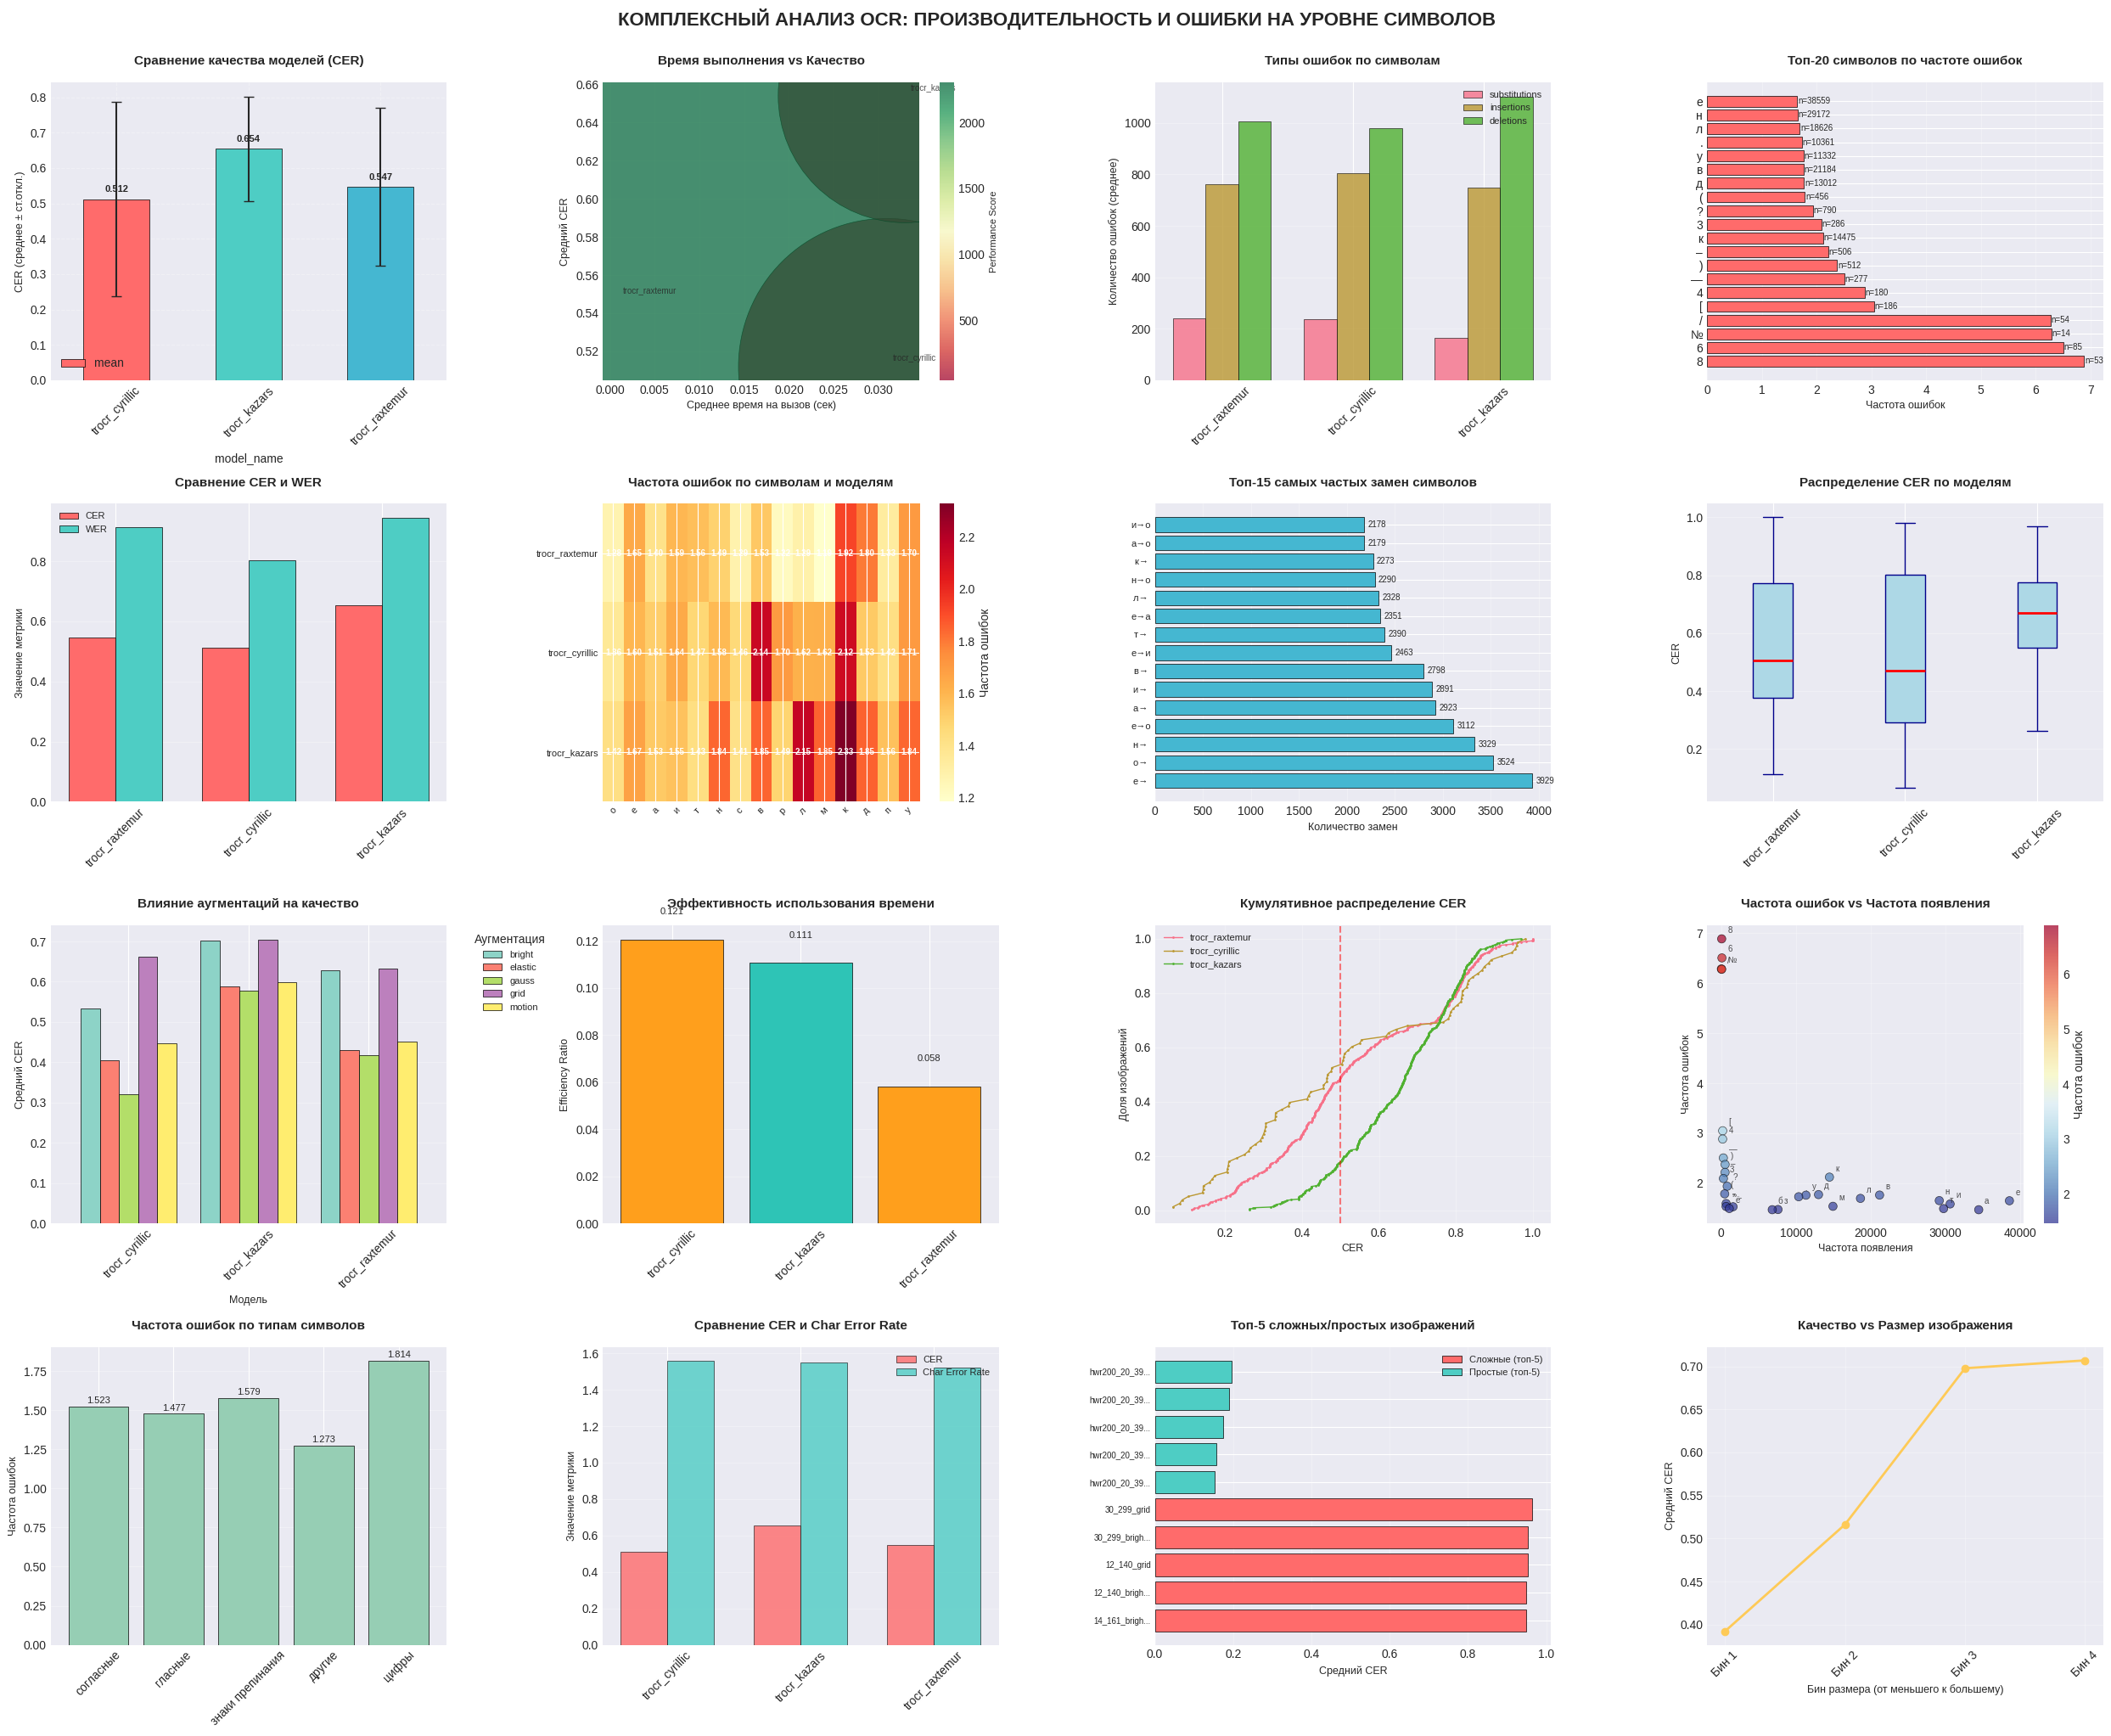


ДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ ОШИБОК ПО БУКВАМ

1. ТОП-10 СИМВОЛОВ С НАИБОЛЬШЕЙ ЧАСТОТОЙ ОШИБОК:
  о: 135.175% (63766 из 47173)
  е: 164.939% (63599 из 38559)
  а: 146.984% (50639 из 34452)
  и: 158.510% (48542 из 30624)
  н: 165.237% (48203 из 29172)
  т: 149.227% (44395 из 29750)
  в: 176.312% (37350 из 21184)
  с: 136.642% (33722 из 24679)
  л: 169.661% (31601 из 18626)
  к: 212.180% (30713 из 14475)

2. ТОП-10 САМЫХ ЧАСТЫХ ЗАМЕН СИМВОЛОВ:
  1. е→ : 3929 раз
  2. о→ : 3524 раз
  3. н→ : 3329 раз
  4. е→о: 3112 раз
  5. а→ : 2923 раз
  6. и→ : 2891 раз
  7. в→ : 2798 раз
  8. е→и: 2463 раз
  9. т→ : 2390 раз
  10. е→а: 2351 раз

3. СРАВНЕНИЕ МОДЕЛЕЙ ПО ТОЧНОСТИ СИМВОЛОВ:

  trocr_raxtemur:
    Общая частота ошибок символов: 151.984%
    Замены: 240.52
    Вставки: 761.07
    Удаления: 1004.70

  trocr_cyrillic:
    Общая частота ошибок символов: 155.746%
    Замены: 238.05
    Вставки: 805.03
    Удаления: 980.71

  trocr_kazars:
    Общая частота ошибок символов: 154.851%
    Замены: 166

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
from collections import Counter, defaultdict
import itertools
from difflib import SequenceMatcher
import string
warnings.filterwarnings('ignore')

# Стиль графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# ФУНКЦИИ ДЛЯ ОБРАБОТКИ ДАННЫХ И АНАЛИЗА БУКВ
# ============================================================================

def parse_ncalls(value):
    """
    Преобразует значение ncalls из строки в число.
    Форматы: '285772/1354' -> 285772, '64/2' -> 64, '1' -> 1
    """
    if isinstance(value, str):
        if '/' in value:
            # Берем первую часть до '/'
            return int(value.split('/')[0])
        else:
            try:
                return int(value)
            except:
                return 1
    elif pd.isna(value):
        return 1
    else:
        try:
            return int(value)
        except:
            return 1

def safe_convert_to_numeric(series):
    """Безопасное преобразование серии в числовой формат"""
    return pd.to_numeric(series, errors='coerce')

def analyze_character_errors(pred_text, true_text):
    """
    Анализирует ошибки на уровне символов.
    Возвращает статистику по типам ошибок для символов.
    """
    # Удаляем лишние пробелы и приводим к нижнему регистру для анализа
    pred_clean = pred_text.strip().lower()
    true_clean = true_text.strip().lower()

    # Используем SequenceMatcher для сравнения строк
    matcher = SequenceMatcher(None, true_clean, pred_clean)

    # Собираем статистику
    char_stats = {
        'correct': 0,
        'substitutions': 0,
        'insertions': 0,
        'deletions': 0,
        'total_true_chars': len(true_clean),
        'total_pred_chars': len(pred_clean)
    }

    # Анализируем операции
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'equal':
            char_stats['correct'] += (i2 - i1)
        elif tag == 'replace':
            # Замены
            char_stats['substitutions'] += min(i2-i1, j2-j1)
            # Остальные - вставки или удаления
            diff = abs((i2-i1) - (j2-j1))
            if (i2-i1) > (j2-j1):
                char_stats['deletions'] += diff
            else:
                char_stats['insertions'] += diff
        elif tag == 'delete':
            char_stats['deletions'] += (i2 - i1)
        elif tag == 'insert':
            char_stats['insertions'] += (j2 - j1)

    # Дополнительная статистика по конкретным символам
    char_stats['error_rate'] = (char_stats['substitutions'] + char_stats['insertions'] +
                                char_stats['deletions']) / max(1, char_stats['total_true_chars'])

    return char_stats

def get_character_frequency_analysis(df_ocr_sample, sample_size=100):
    """
    Анализирует частоту ошибок для разных символов.
    """
    # Берем выборку для анализа (можно изменить размер)
    if len(df_ocr_sample) > sample_size:
        df_sample = df_ocr_sample.sample(sample_size, random_state=42)
    else:
        df_sample = df_ocr_sample.copy()

    # Собираем статистику по символам
    char_errors = defaultdict(lambda: {'total': 0, 'errors': 0, 'correct': 0})
    char_confusions = defaultdict(Counter)

    for idx, row in df_sample.iterrows():
        pred_text = str(row['pred']).lower()
        true_text = str(row['gt']).lower()

        # Анализируем ошибки по позициям
        matcher = SequenceMatcher(None, true_text, pred_text)

        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag == 'equal':
                # Правильные символы
                for char in true_text[i1:i2]:
                    if char.strip():  # Игнорируем пробелы
                        char_errors[char]['correct'] += 1
                        char_errors[char]['total'] += 1
            elif tag == 'replace':
                # Замены
                true_chars = true_text[i1:i2]
                pred_chars = pred_text[j1:j2]
                min_len = min(len(true_chars), len(pred_chars))

                for k in range(min_len):
                    true_char = true_chars[k] if k < len(true_chars) else ''
                    pred_char = pred_chars[k] if k < len(pred_chars) else ''

                    if true_char.strip():
                        char_errors[true_char]['errors'] += 1
                        char_errors[true_char]['total'] += 1
                        if pred_char:
                            char_confusions[true_char][pred_char] += 1

                # Обрабатываем оставшиеся символы как вставки/удаления
                if len(true_chars) > len(pred_chars):
                    for char in true_chars[min_len:]:
                        if char.strip():
                            char_errors[char]['errors'] += 1
                            char_errors[char]['total'] += 1
                            char_confusions[char]['[DELETED]'] += 1
                elif len(pred_chars) > len(true_chars):
                    for char in pred_chars[min_len:]:
                        if true_chars and true_chars[0].strip():
                            char_errors[true_chars[0]]['errors'] += 1
                            char_confusions[true_chars[0]][char] += 1

    # Вычисляем частоту ошибок
    char_error_rates = {}
    for char, stats in char_errors.items():
        if stats['total'] > 0:
            error_rate = stats['errors'] / stats['total']
            char_error_rates[char] = {
                'error_rate': error_rate,
                'total_occurrences': stats['total'],
                'errors': stats['errors'],
                'correct': stats['correct']
            }

    return char_error_rates, char_confusions

def analyze_confusion_pairs(char_confusions, top_n=20):
    """
    Анализирует наиболее частые пары замен.
    """
    confusion_pairs = []

    for true_char, pred_counter in char_confusions.items():
        for pred_char, count in pred_counter.most_common():
            if true_char != pred_char and pred_char != '[DELETED]':
                confusion_pairs.append({
                    'true': true_char,
                    'pred': pred_char,
                    'count': count
                })

    # Сортируем по частоте
    confusion_pairs.sort(key=lambda x: x['count'], reverse=True)

    return confusion_pairs[:top_n]

# ============================================================================
# ПОДГОТОВКА ДАННЫХ
# ============================================================================

print("="*80)
print("АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ OCR МОДЕЛЕЙ С АНАЛИЗОМ ОШИБОК ПО БУКВАМ")
print("="*80)

# 1. Обрабатываем колонку ncalls в df
print("\nОбработка данных...")
df['ncalls_parsed'] = df['ncalls'].apply(parse_ncalls)

# Преобразуем числовые колонки к нужному типу
numeric_cols = ['tottime', 'percall_tottime', 'cumtime', 'percall_cumtime',
                'img_width', 'img_height']
for col in numeric_cols:
    df[col] = safe_convert_to_numeric(df[col])

# Аналогично для df_ocr
numeric_cols_ocr = ['distance', 'cer', 'wer']
for col in numeric_cols_ocr:
    df_ocr[col] = safe_convert_to_numeric(df_ocr[col])

# ============================================================================
# АНАЛИЗ ОШИБОК ПО БУКВАМ
# ============================================================================

print("\nАнализ ошибок на уровне символов...")

# 1. Анализ ошибок для каждой модели
models_char_errors = {}
all_char_error_rates = {}
all_char_confusions = {}

for model in df_ocr['model_name'].unique():
    print(f"Анализ модели: {model}")
    model_data = df_ocr[df_ocr['model_name'] == model]

    # Анализ частоты ошибок по символам
    char_error_rates, char_confusions = get_character_frequency_analysis(model_data, sample_size=200)
    all_char_error_rates[model] = char_error_rates
    all_char_confusions[model] = char_confusions

    # Средняя статистика по модели
    total_char_stats = {'correct': 0, 'substitutions': 0, 'insertions': 0,
                       'deletions': 0, 'total_true_chars': 0}

    sample_size = min(100, len(model_data))
    for idx, row in model_data.sample(sample_size, random_state=42).iterrows():
        char_stats = analyze_character_errors(str(row['pred']), str(row['gt']))
        for key in total_char_stats:
            total_char_stats[key] += char_stats.get(key, 0)

    # Вычисляем средние значения
    for key in total_char_stats:
        total_char_stats[key] /= sample_size

    total_char_stats['total_errors'] = (total_char_stats['substitutions'] +
                                       total_char_stats['insertions'] +
                                       total_char_stats['deletions'])

    if total_char_stats['total_true_chars'] > 0:
        total_char_stats['char_error_rate'] = (total_char_stats['total_errors'] /
                                              total_char_stats['total_true_chars'])
    else:
        total_char_stats['char_error_rate'] = 0

    models_char_errors[model] = total_char_stats

# Создаем DataFrame для анализа ошибок по буквам
char_errors_df = pd.DataFrame(models_char_errors).T
print("\nСтатистика ошибок по символам по моделям:")
print(char_errors_df.round(4))

# ============================================================================
# ОСНОВНОЙ АНАЛИЗ (как в предыдущем коде)
# ============================================================================

# Анализ временных характеристик из df
time_stats = df.groupby('model_name').agg({
    'tottime': 'sum',
    'cumtime': 'sum',
    'percall_cumtime': 'mean',
    'ncalls_parsed': 'sum'
}).round(3)

time_stats = time_stats.fillna(0)
time_stats['avg_time_per_call'] = time_stats['cumtime'] / time_stats['ncalls_parsed'].replace(0, 1)
time_stats['efficiency_ratio'] = np.where(
    time_stats['cumtime'] > 0,
    time_stats['tottime'] / time_stats['cumtime'],
    0
)

# Анализ качества из df_ocr
quality_stats = df_ocr.groupby('model_name').agg({
    'cer': ['mean', 'median', 'std', 'min', 'max'],
    'wer': ['mean', 'median', 'std'],
    'distance': 'mean'
}).round(3)
quality_stats = quality_stats.fillna(0)

# Объединяем статистику
model_performance = pd.merge(
    time_stats[['cumtime', 'avg_time_per_call', 'efficiency_ratio']],
    quality_stats['cer'][['mean', 'std']].rename(
        columns={'mean': 'cer_mean', 'std': 'cer_std'}
    ),
    left_index=True, right_index=True
)

model_performance['performance_score'] = np.where(
    (model_performance['cer_mean'] > 0) & (model_performance['avg_time_per_call'] > 0),
    1 / (model_performance['cer_mean'] * np.log1p(model_performance['avg_time_per_call'])),
    0
).round(3)

# ============================================================================
# РАСШИРЕННАЯ ВИЗУАЛИЗАЦИЯ С ГРАФИКАМИ ОШИБОК ПО БУКВАМ
# ============================================================================

fig = plt.figure(figsize=(25, 20))

# График 1: Сравнение качества моделей (CER)
ax1 = plt.subplot(4, 4, 1)
cer_data = df_ocr.groupby('model_name')['cer'].agg(['mean', 'std']).fillna(0)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
colors = colors[:len(cer_data)]
cer_data.plot(kind='bar', y='mean', yerr='std', capsize=4, ax=ax1,
              color=colors, edgecolor='black', linewidth=0.5)
ax1.set_title('Сравнение качества моделей (CER)', fontsize=11, fontweight='bold', pad=15)
ax1.set_ylabel('CER (среднее ± ст.откл.)', fontsize=9)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(cer_data['mean']):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=8, fontweight='bold')

# График 2: Время выполнения vs Качество
ax2 = plt.subplot(4, 4, 2)
models = model_performance.index
x = model_performance['avg_time_per_call']
y = model_performance['cer_mean']
x_safe = x.replace(0, np.nan).fillna(x.mean() if x.mean() > 0 else 1)
y_safe = y.replace(0, np.nan).fillna(y.mean() if y.mean() > 0 else 0.5)
sizes = np.where((y_safe > 0) & (x_safe > 0), 1000 / (y_safe * x_safe), 100)
scatter = ax2.scatter(x_safe, y_safe, s=sizes, alpha=0.7,
                     edgecolors='black', linewidth=0.5,
                     c=model_performance['performance_score'],
                     cmap='RdYlGn')
ax2.set_xlabel('Среднее время на вызов (сек)', fontsize=9)
ax2.set_ylabel('Средний CER', fontsize=9)
ax2.set_title('Время выполнения vs Качество', fontsize=11, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Performance Score', fontsize=8)
for i, model in enumerate(models):
    ax2.annotate(model, (x_safe.iloc[i], y_safe.iloc[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=7, alpha=0.8)

# График 3: Распределение типов ошибок по символам
ax3 = plt.subplot(4, 4, 3)
if not char_errors_df.empty:
    error_types = ['substitutions', 'insertions', 'deletions']
    error_data = char_errors_df[error_types]

    x = np.arange(len(error_data))
    width = 0.25

    for i, error_type in enumerate(error_types):
        offset = (i - 1) * width
        ax3.bar(x + offset, error_data[error_type], width,
                label=error_type, alpha=0.8, edgecolor='black', linewidth=0.5)

    ax3.set_title('Типы ошибок по символам', fontsize=11, fontweight='bold', pad=15)
    ax3.set_ylabel('Количество ошибок (среднее)', fontsize=9)
    ax3.set_xticks(x)
    ax3.set_xticklabels(error_data.index, rotation=45)
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3, axis='y')
else:
    ax3.text(0.5, 0.5, 'Нет данных\nдля анализа',
             ha='center', va='center', fontsize=11)
    ax3.set_title('Типы ошибок по символам', fontsize=11, fontweight='bold', pad=15)

# График 4: Частота ошибок для разных символов (топ-20)
ax4 = plt.subplot(4, 4, 4)
# Объединяем данные по всем моделям для общего анализа
all_chars_combined = defaultdict(lambda: {'total': 0, 'errors': 0})
for model, char_rates in all_char_error_rates.items():
    for char, stats in char_rates.items():
        all_chars_combined[char]['total'] += stats['total_occurrences']
        all_chars_combined[char]['errors'] += stats['errors']

# Вычисляем частоту ошибок
char_error_list = []
for char, stats in all_chars_combined.items():
    if stats['total'] > 10:  # Минимальное количество появлений
        error_rate = stats['errors'] / stats['total']
        char_error_list.append((char, error_rate, stats['total']))

# Сортируем по частоте ошибок
char_error_list.sort(key=lambda x: x[1], reverse=True)
top_chars = char_error_list[:20]

if top_chars:
    chars = [c[0] for c in top_chars]
    rates = [c[1] for c in top_chars]
    totals = [c[2] for c in top_chars]

    bars = ax4.barh(range(len(chars)), rates, color='#FF6B6B',
                    edgecolor='black', linewidth=0.5)
    ax4.set_yticks(range(len(chars)))
    ax4.set_yticklabels(chars)
    ax4.set_xlabel('Частота ошибок', fontsize=9)
    ax4.set_title('Топ-20 символов по частоте ошибок', fontsize=11, fontweight='bold', pad=15)
    ax4.grid(True, alpha=0.3, axis='x')

    # Добавляем количество появлений
    for i, (bar, total) in enumerate(zip(bars, totals)):
        width = bar.get_width()
        ax4.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'n={total}', va='center', fontsize=7)
else:
    ax4.text(0.5, 0.5, 'Недостаточно данных\nдля анализа',
             ha='center', va='center', fontsize=11)
    ax4.set_title('Топ-20 символов по частоте ошибок', fontsize=11, fontweight='bold', pad=15)

# График 5: Сравнение CER и WER
ax5 = plt.subplot(4, 4, 5)
models = df_ocr['model_name'].unique()
x = np.arange(len(models))
width = 0.35
cer_means = df_ocr.groupby('model_name')['cer'].mean().reindex(models).fillna(0).values
wer_means = df_ocr.groupby('model_name')['wer'].mean().reindex(models).fillna(0).values
bars1 = ax5.bar(x - width/2, cer_means, width, label='CER', color='#FF6B6B',
                edgecolor='black', linewidth=0.5)
bars2 = ax5.bar(x + width/2, wer_means, width, label='WER', color='#4ECDC4',
                edgecolor='black', linewidth=0.5)
ax5.set_title('Сравнение CER и WER', fontsize=11, fontweight='bold', pad=15)
ax5.set_ylabel('Значение метрики', fontsize=9)
ax5.set_xticks(x)
ax5.set_xticklabels(models, rotation=45)
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='y')

# График 6: Heatmap частоты ошибок по символам для разных моделей
ax6 = plt.subplot(4, 4, 6)
# Собираем данные для heatmap
common_chars = set()
for model in all_char_error_rates.keys():
    common_chars.update(all_char_error_rates[model].keys())

# Берем топ-15 самых частых символов по общему количеству появлений
if common_chars:
    char_totals = {}
    for char in common_chars:
        total = sum(all_char_error_rates[model].get(char, {}).get('total_occurrences', 0)
                   for model in all_char_error_rates.keys())
        char_totals[char] = total

    top_chars_heatmap = sorted(char_totals.items(), key=lambda x: x[1], reverse=True)[:15]
    heatmap_chars = [c[0] for c in top_chars_heatmap]

    # Создаем матрицу для heatmap
    heatmap_data = []
    for model in all_char_error_rates.keys():
        row = []
        for char in heatmap_chars:
            if char in all_char_error_rates[model]:
                row.append(all_char_error_rates[model][char]['error_rate'])
            else:
                row.append(0)
        heatmap_data.append(row)

    if heatmap_data:
        im = ax6.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
        ax6.set_xticks(range(len(heatmap_chars)))
        ax6.set_xticklabels(heatmap_chars, rotation=45, fontsize=8)
        ax6.set_yticks(range(len(all_char_error_rates)))
        ax6.set_yticklabels(list(all_char_error_rates.keys()), fontsize=8)
        ax6.set_title('Частота ошибок по символам и моделям',
                     fontsize=11, fontweight='bold', pad=15)
        plt.colorbar(im, ax=ax6, label='Частота ошибок')

        # Добавляем значения в ячейки
        for i in range(len(heatmap_data)):
            for j in range(len(heatmap_data[i])):
                ax6.text(j, i, f'{heatmap_data[i][j]:.2f}',
                        ha='center', va='center',
                        color='white' if heatmap_data[i][j] > 0.3 else 'black',
                        fontsize=7, fontweight='bold')
    else:
        ax6.text(0.5, 0.5, 'Недостаточно данных\nдля heatmap',
                ha='center', va='center', fontsize=11)
        ax6.set_title('Частота ошибок по символам и моделям',
                     fontsize=11, fontweight='bold', pad=15)
else:
    ax6.text(0.5, 0.5, 'Нет данных\nдля анализа',
             ha='center', va='center', fontsize=11)
    ax6.set_title('Частота ошибок по символам и моделям',
                 fontsize=11, fontweight='bold', pad=15)

# График 7: Наиболее частые замены символов (confusion matrix)
ax7 = plt.subplot(4, 4, 7)
# Объединяем confusion pairs по всем моделям
all_confusion_pairs = defaultdict(int)
for model, confusions in all_char_confusions.items():
    for true_char, pred_counter in confusions.items():
        for pred_char, count in pred_counter.items():
            if true_char != pred_char and pred_char != '[DELETED]':
                pair = f"{true_char}→{pred_char}"
                all_confusion_pairs[pair] += count

# Берем топ-15 самых частых замен
top_pairs = sorted(all_confusion_pairs.items(), key=lambda x: x[1], reverse=True)[:15]

if top_pairs:
    pairs = [p[0] for p in top_pairs]
    counts = [p[1] for p in top_pairs]

    bars = ax7.barh(range(len(pairs)), counts, color='#45B7D1',
                    edgecolor='black', linewidth=0.5)
    ax7.set_yticks(range(len(pairs)))
    ax7.set_yticklabels(pairs, fontsize=8)
    ax7.set_xlabel('Количество замен', fontsize=9)
    ax7.set_title('Топ-15 самых частых замен символов',
                 fontsize=11, fontweight='bold', pad=15)
    ax7.grid(True, alpha=0.3, axis='x')

    # Добавляем значения
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax7.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                f'{counts[i]}', va='center', fontsize=7)
else:
    ax7.text(0.5, 0.5, 'Недостаточно данных\nдля анализа замен',
             ha='center', va='center', fontsize=11)
    ax7.set_title('Топ-15 самых частых замен символов',
                 fontsize=11, fontweight='bold', pad=15)

# График 8: Распределение CER по моделям (boxplot)
ax8 = plt.subplot(4, 4, 8)
models_unique = df_ocr['model_name'].unique()
box_data = []
for model in models_unique:
    model_data = df_ocr[df_ocr['model_name'] == model]['cer']
    q1 = model_data.quantile(0.25)
    q3 = model_data.quantile(0.75)
    iqr = q3 - q1
    filtered_data = model_data[(model_data >= q1 - 1.5*iqr) &
                              (model_data <= q3 + 1.5*iqr)]
    box_data.append(filtered_data)
bp = ax8.boxplot(box_data, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='darkblue'),
                capprops=dict(color='darkblue'))
ax8.set_xticklabels(models_unique, rotation=45)
ax8.set_title('Распределение CER по моделям', fontsize=11, fontweight='bold', pad=15)
ax8.set_ylabel('CER', fontsize=9)
ax8.grid(True, alpha=0.3, axis='y')

# График 9: Влияние аугментаций на качество
ax9 = plt.subplot(4, 4, 9)
aug_cer = df_ocr.groupby(['model_name', 'augmentation'])['cer'].mean().unstack().fillna(0)
augmentations = aug_cer.columns
n_aug = len(augmentations)
aug_colors = plt.cm.Set3(np.linspace(0, 1, max(n_aug, 1)))
aug_cer.plot(kind='bar', ax=ax9, width=0.8,
             edgecolor='black', linewidth=0.5,
             color=aug_colors[:n_aug])
ax9.set_title('Влияние аугментаций на качество', fontsize=11, fontweight='bold', pad=15)
ax9.set_ylabel('Средний CER', fontsize=9)
ax9.set_xlabel('Модель', fontsize=9)
ax9.tick_params(axis='x', rotation=45)
ax9.legend(title='Аугментация', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax9.grid(True, alpha=0.3, axis='y')

# График 10: Эффективность использования времени
ax10 = plt.subplot(4, 4, 10)
efficiency_data = time_stats[['efficiency_ratio']].copy().fillna(0)
bars = ax10.bar(efficiency_data.index,
                efficiency_data['efficiency_ratio'],
                color=['#FF9F1C', '#2EC4B6'][:len(efficiency_data)],
                edgecolor='black', linewidth=0.5)
ax10.set_title('Эффективность использования времени', fontsize=11, fontweight='bold', pad=15)
ax10.set_ylabel('Efficiency Ratio', fontsize=9)
ax10.tick_params(axis='x', rotation=45)
ax10.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax10.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# График 11: Кумулятивное распределение CER
ax11 = plt.subplot(4, 4, 11)
for model in df_ocr['model_name'].unique():
    model_data = df_ocr[df_ocr['model_name'] == model]['cer'].sort_values()
    model_data = model_data.dropna()
    if len(model_data) > 0:
        y = np.arange(1, len(model_data) + 1) / len(model_data)
        ax11.plot(model_data, y, marker='.', linestyle='-', linewidth=1,
                 markersize=2, label=model)
ax11.set_title('Кумулятивное распределение CER', fontsize=11, fontweight='bold', pad=15)
ax11.set_xlabel('CER', fontsize=9)
ax11.set_ylabel('Доля изображений', fontsize=9)
ax11.legend(fontsize=8)
ax11.grid(True, alpha=0.3)
ax11.axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='CER = 0.5')

# График 12: Частота ошибок vs частота появления символа
ax12 = plt.subplot(4, 4, 12)
if char_error_list:
    # Берем топ-30 символов
    top_30 = char_error_list[:30]
    frequencies = [c[2] for c in top_30]  # total occurrences
    error_rates = [c[1] for c in top_30]  # error rates
    chars = [c[0] for c in top_30]

    scatter = ax12.scatter(frequencies, error_rates, s=50, alpha=0.7,
                          c=error_rates, cmap='RdYlBu_r',
                          edgecolor='black', linewidth=0.5)
    ax12.set_xlabel('Частота появления', fontsize=9)
    ax12.set_ylabel('Частота ошибок', fontsize=9)
    ax12.set_title('Частота ошибок vs Частота появления',
                  fontsize=11, fontweight='bold', pad=15)
    ax12.grid(True, alpha=0.3)

    # Добавляем подписи для некоторых символов
    for i, char in enumerate(chars):
        if error_rates[i] > 0.3 or frequencies[i] > max(frequencies)*0.5:
            ax12.annotate(char, (frequencies[i], error_rates[i]),
                         xytext=(5, 5), textcoords='offset points',
                         fontsize=7, alpha=0.8)

    plt.colorbar(scatter, ax=ax12, label='Частота ошибок')
else:
    ax12.text(0.5, 0.5, 'Недостаточно данных\nдля анализа',
             ha='center', va='center', fontsize=11)
    ax12.set_title('Частота ошибок vs Частота появления',
                  fontsize=11, fontweight='bold', pad=15)

# График 13: Анализ ошибок для разных типов символов
ax13 = plt.subplot(4, 4, 13)
# Классифицируем символы
char_categories = {
    'гласные': 'аеёиоуыэюя',
    'согласные': 'бвгджзйклмнпрстфхцчшщ',
    'знаки препинания': '.,!?-:;"\'()',
    'цифры': '0123456789',
    'пробелы': ' '
}

# Собираем статистику по категориям
category_stats = defaultdict(lambda: {'total': 0, 'errors': 0})
for model, char_rates in all_char_error_rates.items():
    for char, stats in char_rates.items():
        # Находим категорию символа
        category = 'другие'
        for cat_name, cat_chars in char_categories.items():
            if char in cat_chars:
                category = cat_name
                break

        category_stats[category]['total'] += stats['total_occurrences']
        category_stats[category]['errors'] += stats['errors']

# Вычисляем частоту ошибок по категориям
categories = []
error_rates = []
for category, stats in category_stats.items():
    if stats['total'] > 0:
        categories.append(category)
        error_rates.append(stats['errors'] / stats['total'])

if categories:
    bars = ax13.bar(categories, error_rates, color='#96CEB4',
                    edgecolor='black', linewidth=0.5)
    ax13.set_title('Частота ошибок по типам символов',
                  fontsize=11, fontweight='bold', pad=15)
    ax13.set_ylabel('Частота ошибок', fontsize=9)
    ax13.tick_params(axis='x', rotation=45)
    ax13.grid(True, alpha=0.3, axis='y')

    # Добавляем значения
    for bar in bars:
        height = bar.get_height()
        ax13.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)
else:
    ax13.text(0.5, 0.5, 'Недостаточно данных\nдля анализа категорий',
             ha='center', va='center', fontsize=11)
    ax13.set_title('Частота ошибок по типам символов',
                  fontsize=11, fontweight='bold', pad=15)

# График 14: Сравнение моделей по различным типам ошибок
ax14 = plt.subplot(4, 4, 14)
if not char_errors_df.empty and 'char_error_rate' in char_errors_df.columns:
    # Сравниваем CER и char_error_rate
    comparison_data = pd.DataFrame({
        'CER': df_ocr.groupby('model_name')['cer'].mean(),
        'Char Error Rate': char_errors_df['char_error_rate']
    }).fillna(0)

    x = np.arange(len(comparison_data))
    width = 0.35

    bars1 = ax14.bar(x - width/2, comparison_data['CER'], width,
                    label='CER', color='#FF6B6B', alpha=0.8,
                    edgecolor='black', linewidth=0.5)
    bars2 = ax14.bar(x + width/2, comparison_data['Char Error Rate'], width,
                    label='Char Error Rate', color='#4ECDC4', alpha=0.8,
                    edgecolor='black', linewidth=0.5)

    ax14.set_title('Сравнение CER и Char Error Rate',
                  fontsize=11, fontweight='bold', pad=15)
    ax14.set_ylabel('Значение метрики', fontsize=9)
    ax14.set_xticks(x)
    ax14.set_xticklabels(comparison_data.index, rotation=45)
    ax14.legend(fontsize=8)
    ax14.grid(True, alpha=0.3, axis='y')
else:
    ax14.text(0.5, 0.5, 'Нет данных\nдля сравнения',
             ha='center', va='center', fontsize=11)
    ax14.set_title('Сравнение CER и Char Error Rate',
                  fontsize=11, fontweight='bold', pad=15)

# График 15: Топ-5 самых сложных и простых изображений
ax15 = plt.subplot(4, 4, 15)
file_difficulty = df_ocr.groupby('file_name')['cer'].mean().sort_values()
file_difficulty = file_difficulty.dropna()
if len(file_difficulty) >= 10:
    top5_hard = file_difficulty.tail(5)
    top5_easy = file_difficulty.head(5)
    x_hard = range(len(top5_hard))
    x_easy = range(len(top5_easy), len(top5_easy) + len(top5_easy))
    bars_hard = ax15.barh(x_hard, top5_hard.values, color='#FF6B6B',
                         label='Сложные (топ-5)', edgecolor='black', linewidth=0.5)
    bars_easy = ax15.barh(x_easy, top5_easy.values, color='#4ECDC4',
                         label='Простые (топ-5)', edgecolor='black', linewidth=0.5)
    ax15.set_title('Топ-5 сложных/простых изображений', fontsize=11, fontweight='bold', pad=15)
    ax15.set_xlabel('Средний CER', fontsize=9)
    ax15.set_yticks(list(x_hard) + list(x_easy))
    ax15.set_yticklabels(
        [name[:12] + '...' if len(name) > 12 else name for name in list(top5_hard.index)] +
        [name[:12] + '...' if len(name) > 12 else name for name in list(top5_easy.index)],
        fontsize=7
    )
    ax15.legend(fontsize=8)
    ax15.grid(True, alpha=0.3, axis='x')
else:
    ax15.text(0.5, 0.5, 'Недостаточно данных\nдля анализа топ-5',
             ha='center', va='center', fontsize=11)
    ax15.set_title('Топ-5 сложных/простых изображений', fontsize=11, fontweight='bold', pad=15)

# График 16: Зависимость качества от размера изображения (упрощенная версия)
ax16 = plt.subplot(4, 4, 16)
df_merged = pd.merge(
    df[['file_name', 'img_width', 'img_height']].drop_duplicates(),
    df_ocr[['file_name', 'cer', 'model_name']],
    on='file_name'
)
df_merged['img_width'] = safe_convert_to_numeric(df_merged['img_width'])
df_merged['img_height'] = safe_convert_to_numeric(df_merged['img_height'])
df_merged['img_area'] = df_merged['img_width'] * df_merged['img_height']
df_merged = df_merged.dropna(subset=['img_area', 'cer'])

if len(df_merged) > 0:
    # Берем среднее CER по бинам площади
    df_merged['area_bin'] = pd.qcut(df_merged['img_area'], 5, duplicates='drop')
    area_cer = df_merged.groupby('area_bin')['cer'].mean()

    if len(area_cer) > 1:
        ax16.plot(range(len(area_cer)), area_cer.values, marker='o',
                 linestyle='-', color='#FECA57', linewidth=2, markersize=6)
        ax16.set_title('Качество vs Размер изображения',
                      fontsize=11, fontweight='bold', pad=15)
        ax16.set_xlabel('Бин размера (от меньшего к большему)', fontsize=9)
        ax16.set_ylabel('Средний CER', fontsize=9)
        ax16.grid(True, alpha=0.3)
        ax16.set_xticks(range(len(area_cer)))
        ax16.set_xticklabels([f'Бин {i+1}' for i in range(len(area_cer))], rotation=45)
    else:
        ax16.text(0.5, 0.5, 'Недостаточно данных\nдля анализа',
                 ha='center', va='center', fontsize=11)
        ax16.set_title('Качество vs Размер изображения',
                      fontsize=11, fontweight='bold', pad=15)
else:
    ax16.text(0.5, 0.5, 'Нет данных\nдля анализа',
             ha='center', va='center', fontsize=11)
    ax16.set_title('Качество vs Размер изображения',
                  fontsize=11, fontweight='bold', pad=15)

plt.tight_layout()
plt.suptitle('КОМПЛЕКСНЫЙ АНАЛИЗ OCR: ПРОИЗВОДИТЕЛЬНОСТЬ И ОШИБКИ НА УРОВНЕ СИМВОЛОВ',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# ============================================================================
# ДОПОЛНИТЕЛЬНЫЕ ТАБЛИЦЫ И ВЫВОДЫ
# ============================================================================

print("\n" + "="*80)
print("ДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ ОШИБОК ПО БУКВАМ")

# 1. Таблица с частотой ошибок по символам
print("\n1. ТОП-10 СИМВОЛОВ С НАИБОЛЬШЕЙ ЧАСТОТОЙ ОШИБОК:")
char_error_summary = []
for char, stats in all_chars_combined.items():
    if stats['total'] >= 10:  # Минимальная частота
        error_rate = stats['errors'] / stats['total']
        char_error_summary.append({
            'Символ': char,
            'Всего появлений': stats['total'],
            'Ошибок': stats['errors'],
            'Частота ошибок': f"{error_rate:.3%}"
        })

char_error_summary.sort(key=lambda x: x['Ошибок'], reverse=True)
for item in char_error_summary[:10]:
    print(f"  {item['Символ']}: {item['Частота ошибок']} ({item['Ошибок']} из {item['Всего появлений']})")

# 2. Таблица с самыми частыми заменами
print("\n2. ТОП-10 САМЫХ ЧАСТЫХ ЗАМЕН СИМВОЛОВ:")
if all_confusion_pairs:
    top_replacements = sorted(all_confusion_pairs.items(), key=lambda x: x[1], reverse=True)[:10]
    for i, (pair, count) in enumerate(top_replacements, 1):
        print(f"  {i}. {pair}: {count} раз")

# 3. Анализ по моделям
print("\n3. СРАВНЕНИЕ МОДЕЛЕЙ ПО ТОЧНОСТИ СИМВОЛОВ:")
for model in models_char_errors.keys():
    stats = models_char_errors[model]
    print(f"\n  {model}:")
    print(f"    Общая частота ошибок символов: {stats.get('char_error_rate', 0):.3%}")
    print(f"    Замены: {stats.get('substitutions', 0):.2f}")
    print(f"    Вставки: {stats.get('insertions', 0):.2f}")
    print(f"    Удаления: {stats.get('deletions', 0):.2f}")

# 4. Рекомендации по улучшению
print("\n" + "="*80)
print("РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ ТОЧНОСТИ OCR:")

# Анализ проблемных символов
problematic_chars = [c for c in char_error_list if c[1] > 0.3 and c[2] > 20]
if problematic_chars:
    print("\n1. ПРОБЛЕМНЫЕ СИМВОЛЫ (частота ошибок > 30%):")
    for char, error_rate, total in problematic_chars[:5]:
        print(f"   - '{char}': {error_rate:.1%} ошибок ({total} появлений)")

    # Анализ возможных причин
    print("\n2. ВОЗМОЖНЫЕ ПРИЧИНЫ:")
    print("   - Похожие по начертанию символы (о/а, и/й, п/р)")
    print("   - Специфические символы или редкие буквы")
    print("   - Проблемы с сегментацией текста")

# Рекомендации по дообучению моделей
print("\n3. РЕКОМЕНДАЦИИ ПО ДООБУЧЕНИЮ:")
print("   - Увеличить количество примеров с проблемными символами")
print("   - Добавить аугментации, имитирующие плохое качество печати")
print("   - Использовать словари для постобработки")
print("   - Настроить пороги уверенности для проблемных символов")

# Сохранение результатов
print("\n" + "="*80)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА...")

try:
    # Сохраняем основные таблицы
    model_performance.to_csv('model_performance_summary.csv')
    time_stats.to_csv('time_statistics.csv')
    quality_stats.to_csv('quality_statistics.csv')

    # Сохраняем данные по ошибкам символов
    char_errors_df.to_csv('character_errors_by_model.csv')

    # Сохраняем детальную статистику по символам
    char_error_details = []
    for char, stats in all_chars_combined.items():
        if stats['total'] > 0:
            char_error_details.append({
                'character': char,
                'total_occurrences': stats['total'],
                'errors': stats['errors'],
                'error_rate': stats['errors'] / stats['total']
            })

    char_error_details_df = pd.DataFrame(char_error_details)
    char_error_details_df.to_csv('character_error_details.csv', index=False)

    print("Результаты сохранены в файлы:")
    print("  - model_performance_summary.csv")
    print("  - time_statistics.csv")
    print("  - quality_statistics.csv")
    print("  - character_errors_by_model.csv")
    print("  - character_error_details.csv")

except Exception as e:
    print(f"Ошибка при сохранении файлов: {e}")

print("\n" + "="*80)
print("АНАЛИЗ ЗАВЕРШЕН!")
print("="*80)